Data Exploration

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Store plots in notebook
%matplotlib inline

# Suppress unwanted messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV
superstore_df = pd.read_csv('Resources/Sample - Superstore.csv')
superstore_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Information
superstore_df.info

<bound method DataFrame.info of       Row_ID        Order_ID Order_Date Ship_Date       Ship_Mode Customer_ID  \
0          1  CA-2016-152156    11/8/16  11/11/16    Second Class    CG-12520   
1          2  CA-2016-152156    11/8/16  11/11/16    Second Class    CG-12520   
2          3  CA-2016-138688    6/12/16   6/16/16    Second Class    DV-13045   
3          4  US-2015-108966   10/11/15  10/18/15  Standard Class    SO-20335   
4          5  US-2015-108966   10/11/15  10/18/15  Standard Class    SO-20335   
...      ...             ...        ...       ...             ...         ...   
9989    9990  CA-2014-110422    1/21/14   1/23/14    Second Class    TB-21400   
9990    9991  CA-2017-121258    2/26/17    3/3/17  Standard Class    DB-13060   
9991    9992  CA-2017-121258    2/26/17    3/3/17  Standard Class    DB-13060   
9992    9993  CA-2017-121258    2/26/17    3/3/17  Standard Class    DB-13060   
9993    9994  CA-2017-119914     5/4/17    5/9/17    Second Class    CC-12220

In [4]:
# Column information 
superstore_df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Check for nulls
superstore_df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# dtypes
superstore_df.dtypes

Row_ID             int64
Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code        int64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
# Convert date objects to dates
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'])
superstore_df['Ship_Date'] = pd.to_datetime(superstore_df['Ship_Date'])
superstore_df.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
# Describe numerical columns
superstore_df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Data Analysis

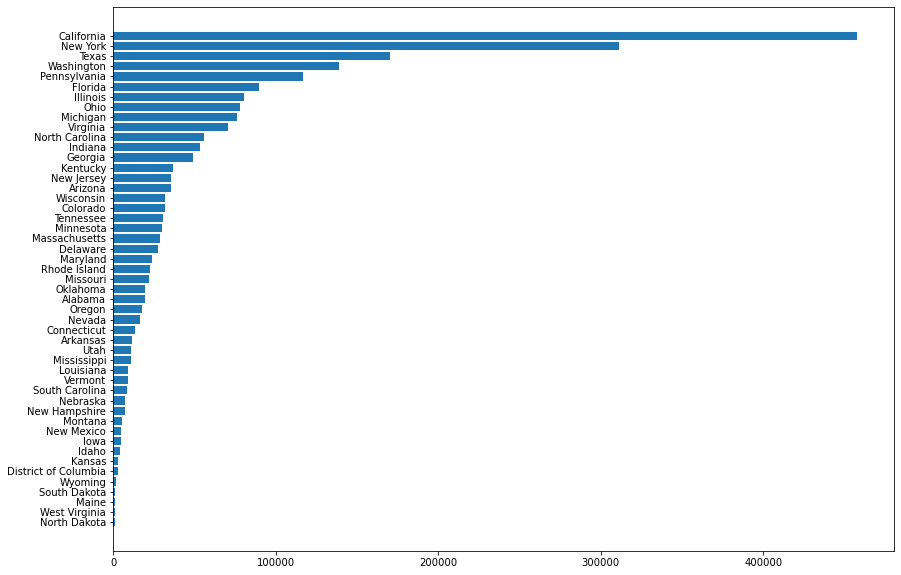

In [9]:
# Get Sales by State
sales_by_state = superstore_df.groupby(['State']).sum()[['Sales']].reset_index().sort_values(by='Sales',ascending=True)
plt.figure(figsize=[14,10])
plt.barh(y=sales_by_state['State'],width=sales_by_state['Sales'])
plt.savefig('Images/salesbystate.png') # save as png

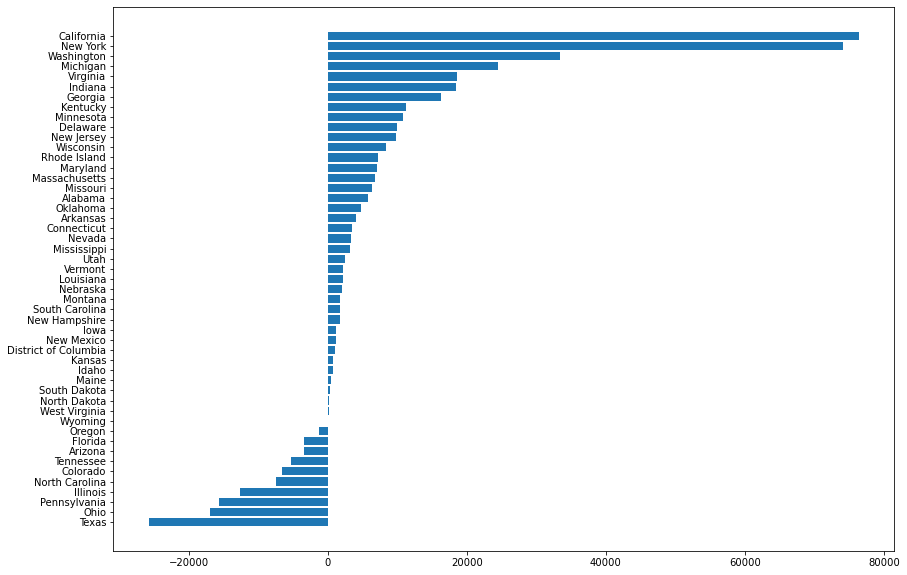

In [10]:
# Get Profit by State
profit_by_state = superstore_df.groupby(['State']).sum()[['Profit']].reset_index().sort_values(by='Profit',ascending=True)
plt.figure(figsize=[14,10])
plt.barh(y=profit_by_state['State'],width=profit_by_state['Profit'])
plt.savefig('Images/profitbystate.png') # save as png

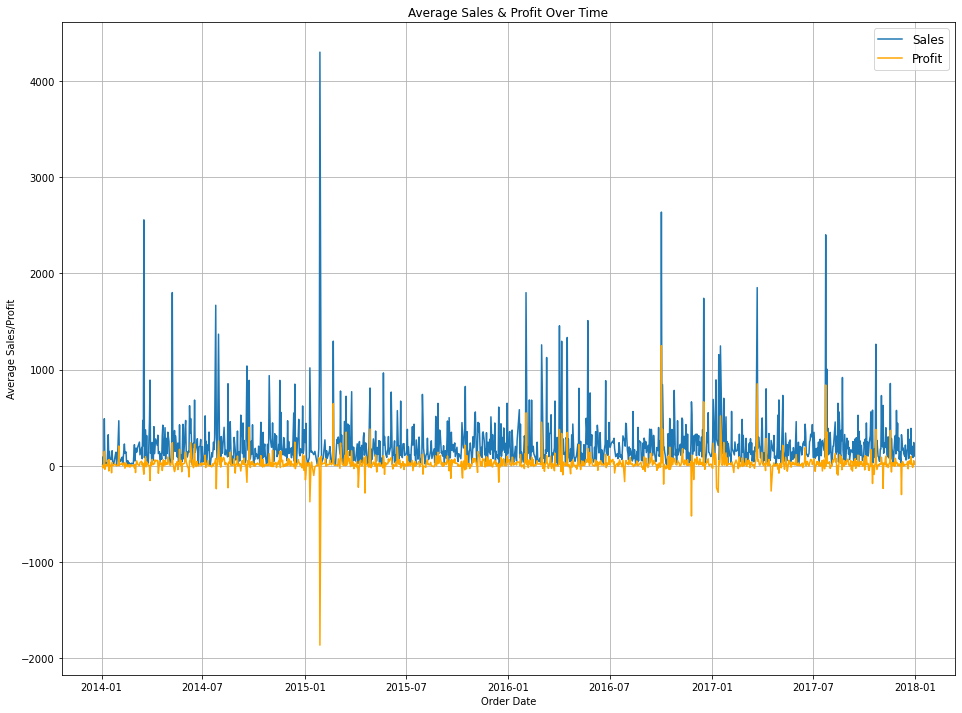

In [11]:
# Sales and Profit Over Time
figure = plt.figure(figsize=[16,12])
sp_by_state = (superstore_df[['Order_Date','Sales','Profit']].sort_values(by='Order_Date')).groupby('Order_Date').agg({'Sales':'mean','Profit':'mean'})
plt.plot(sp_by_state.index, sp_by_state['Sales'],label='Sales')
plt.plot(sp_by_state.index, sp_by_state['Profit'], color = 'orange',label='Profit')
plt.xlabel('Order Date')
plt.ylabel('Average Sales/Profit')
plt.legend(fontsize=12)
plt.title('Average Sales & Profit Over Time')
plt.grid()
plt.savefig('Images/salesprofitovertime.png') # save as png

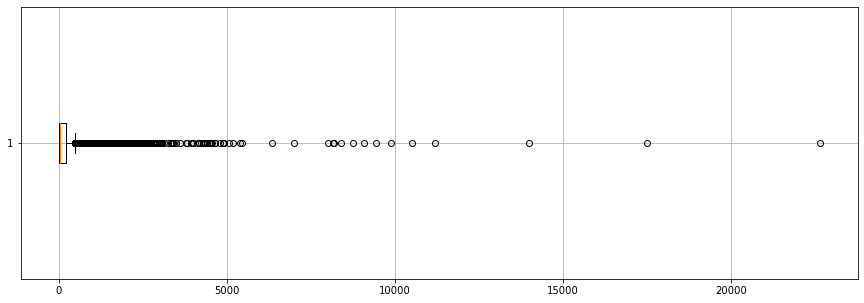

In [12]:
# Boxplot of distribution of Sales
figure = plt.figure(figsize=[15,5])
plt.boxplot(superstore_df['Sales'], vert=False)
plt.grid()
plt.savefig('Images/salesboxplot.png') # save as png

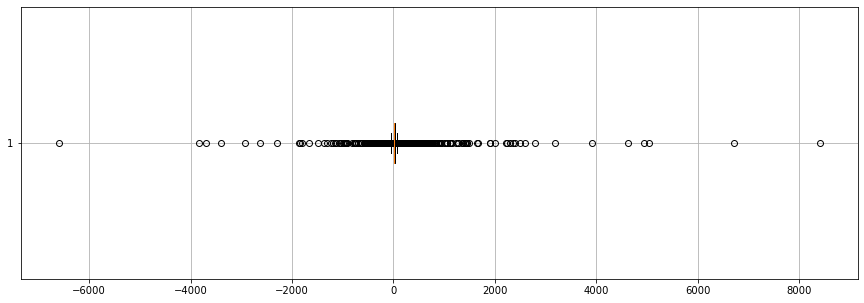

In [13]:
# Boxplot of distribution of Profit
figure = plt.figure(figsize=[15,5])
plt.boxplot(superstore_df['Profit'], vert=False)
plt.grid()
plt.savefig('Images/profitboxplot.png') # save as png

In [14]:
# Get Sales Profits per customer segment
sales_segment_df = superstore_df[['Segment','Sales','Profit']]
consumer_df = sales_segment_df[sales_segment_df['Segment']=='Consumer']
corporate_df = sales_segment_df[sales_segment_df['Segment']=='Corporate']
homeoffice_df = sales_segment_df[sales_segment_df['Segment']=='Home Office']

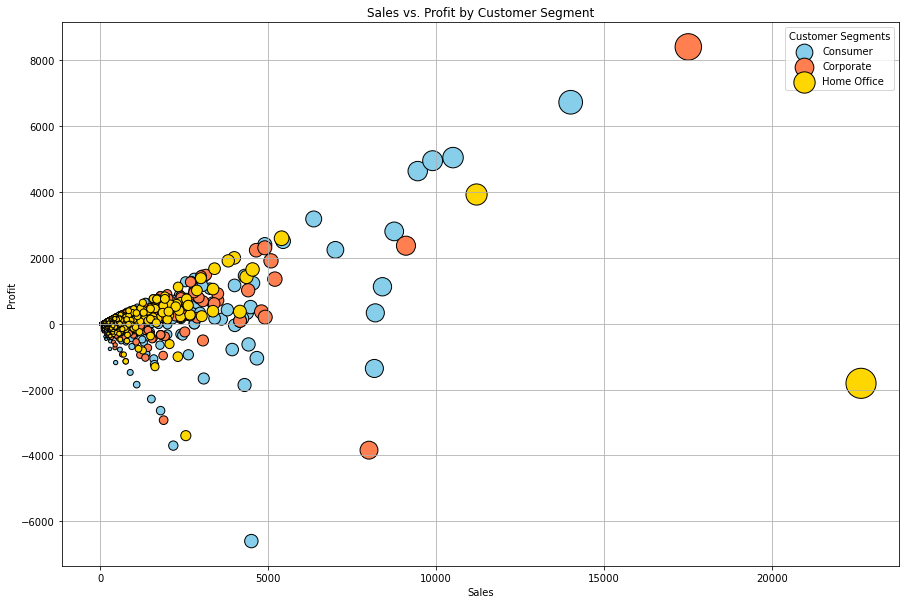

In [15]:
# View Sales vs. Profit per customer segment
plt.figure(figsize=[15,10])
# Build scatterplot
plt.scatter(x=consumer_df['Sales'],y=consumer_df['Profit'],c='skyblue',edgecolor='black', s=(consumer_df['Sales']/25), label='Consumer')
plt.scatter(x=corporate_df['Sales'],y=corporate_df['Profit'],c='coral',edgecolor='black', s=(corporate_df['Sales']/25), label='Corporate')
plt.scatter(x=homeoffice_df['Sales'],y=homeoffice_df['Profit'],c='gold',edgecolor='black', s=(homeoffice_df['Sales']/25), label='Home Office')
# Graph properties
plt.title('Sales vs. Profit by Customer Segment')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()
#Create legend
lgnd = plt.legend(mode='Expanded',title='Customer Segments')
plt.savefig('Images/salesprofitbysegment.png') # save as png

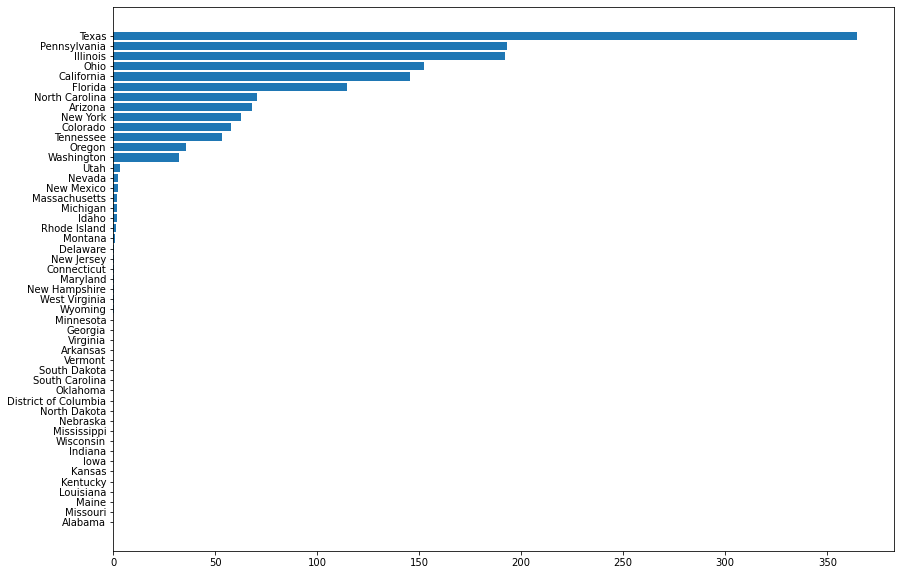

In [16]:
# Get Discounts by State
discount_by_state = superstore_df.groupby(['State']).sum()[['Discount']].reset_index().sort_values(by='Discount',ascending=True)
plt.figure(figsize=[14,10])
plt.barh(y=discount_by_state['State'],width=discount_by_state['Discount'])
plt.savefig('Images/discountsbystate.png') # save as png

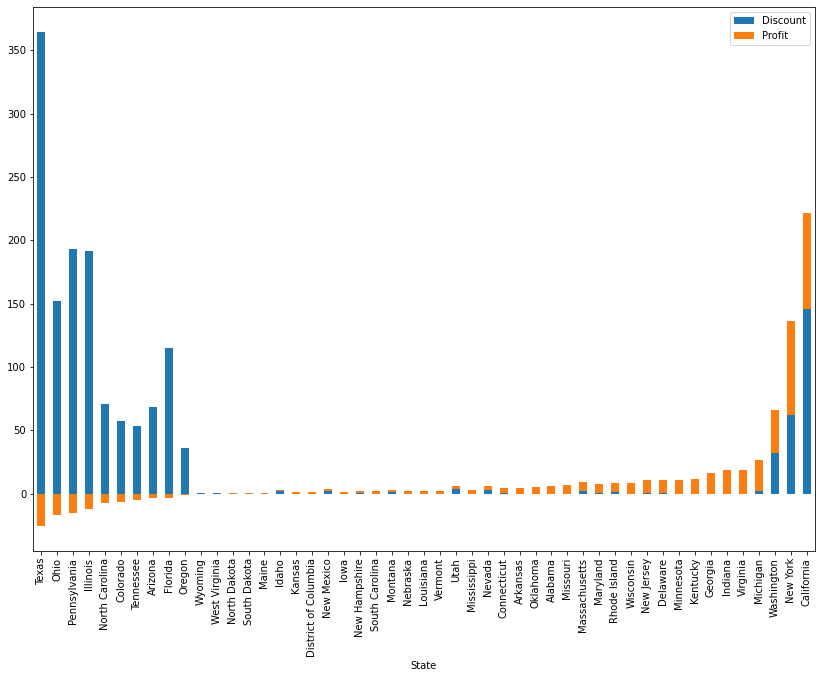

In [17]:
# Stacked discount and profit
dp_by_state = superstore_df.groupby(['State']).sum()[['Discount','Profit']].reset_index().sort_values(by='Profit', ascending=True)
dp_by_state['Profit'] = dp_by_state['Profit']/1000
dp_by_state = dp_by_state.set_index('State')
dp_by_state.plot(kind='bar',stacked=True, figsize=[14,10])
plt.savefig('Images/stackeddiscountprofit.png') # save as png

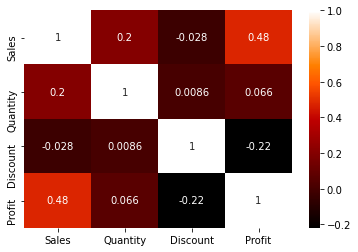

In [18]:
# Heatmap
g = sns.heatmap(superstore_df[['Sales','Quantity','Discount','Profit']].corr(method='pearson'), annot=True, cmap='gist_heat')
plt.savefig('Images/heatmap.png') # save as png

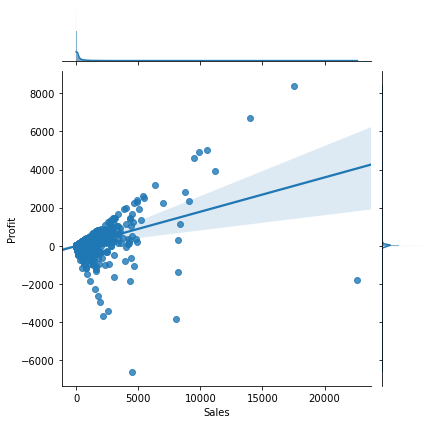

In [19]:
# Jointplot of sales to profit
sns.jointplot(x=superstore_df['Sales'],y=superstore_df['Profit'], kind='reg', truncate=False)
plt.savefig('Images/salesprofitjp.png') # save as png

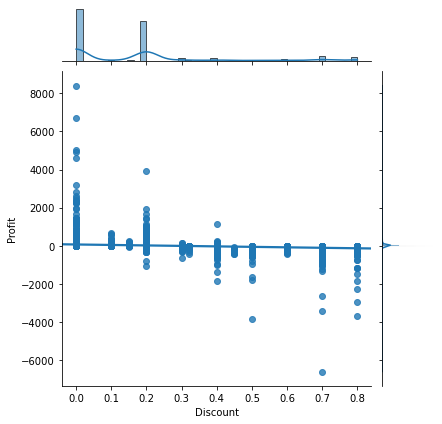

In [20]:
# Jointplot of discount to profit
sns.jointplot(x=superstore_df['Discount'],y=superstore_df['Profit'], kind='reg', truncate=False)
plt.savefig('Images/discountprofitjp.png') # save as png

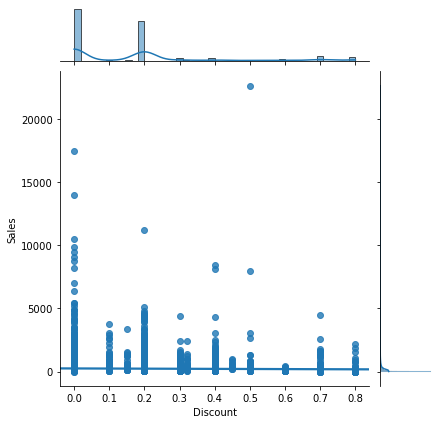

In [21]:
# Jointplot of discount to sales
sns.jointplot(x=superstore_df['Discount'],y=superstore_df['Sales'], kind='reg', truncate=False)
plt.savefig('Images/discountsalesjp.png') # save as png

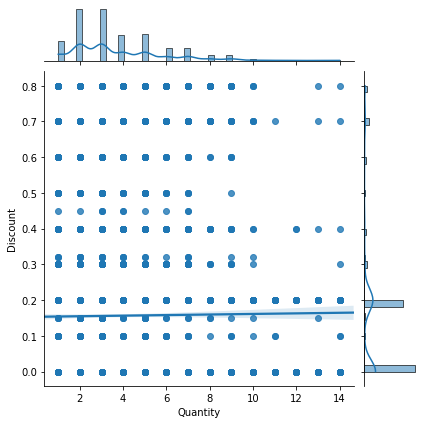

In [22]:
# Jointplot of quantity to discount
sns.jointplot(x=superstore_df['Quantity'],y=superstore_df['Discount'], kind='reg', truncate=False)
plt.savefig('Images/quantitysalesjp.png') # save as png

In [ ]:
# Jointplot of quantity to profit
sns.jointplot(x=superstore_df['Quantity'],y=superstore_df['Discount'], kind='reg', truncate=False)
plt.savefig('Images/quantitysalesjp.png') # save as png